In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

df = pd.read_csv("./data/ds_salaries.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [3]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [5]:
target = "salary_in_usd"

In [8]:
# Selección de variables
num_features = ['work_year', 'remote_ratio', 'salary_in_usd']
cat_features = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']


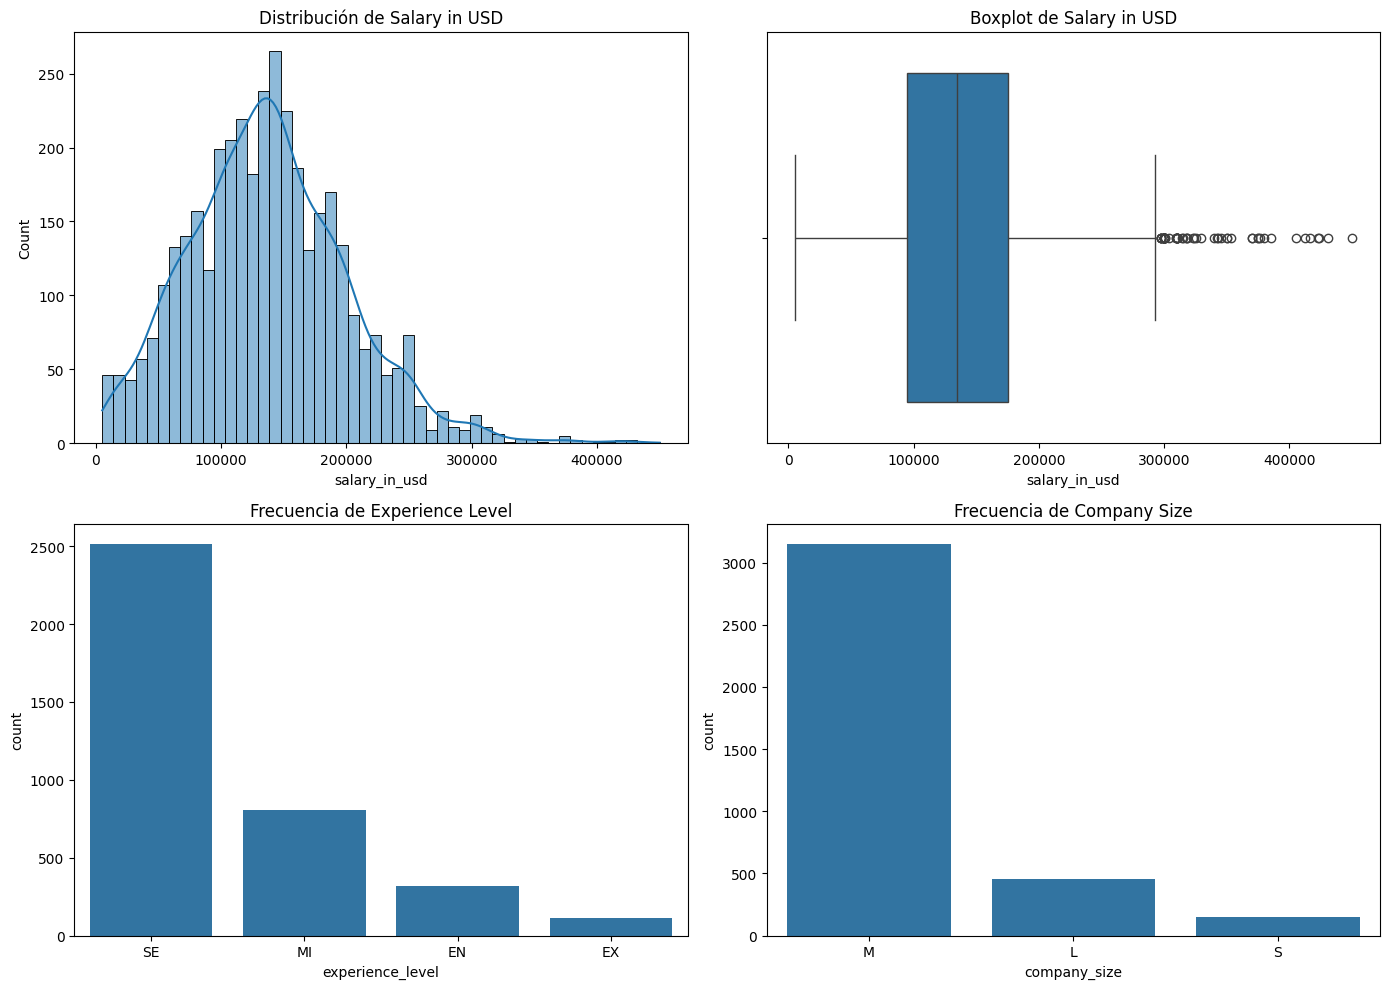

In [17]:
# Análisis Univariante de salary_in_usd, experience_leve, company_size
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['salary_in_usd'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Salary in USD')

sns.boxplot(x=df['salary_in_usd'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot de Salary in USD')

sns.countplot(x=df['experience_level'], order=df['experience_level'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('Frecuencia de Experience Level')

sns.countplot(x=df['company_size'], order=df['company_size'].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_title('Frecuencia de Company Size')

plt.tight_layout()
plt.show()


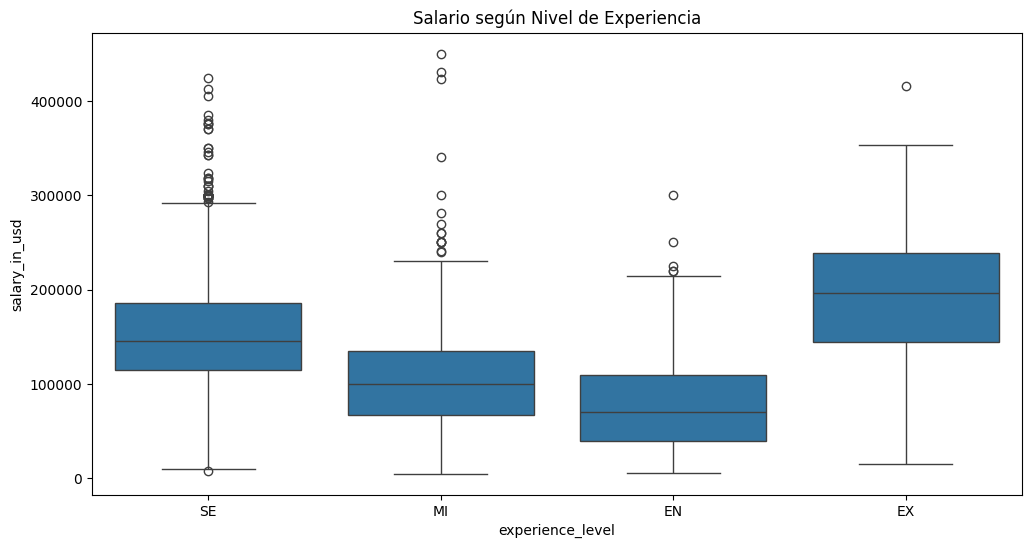

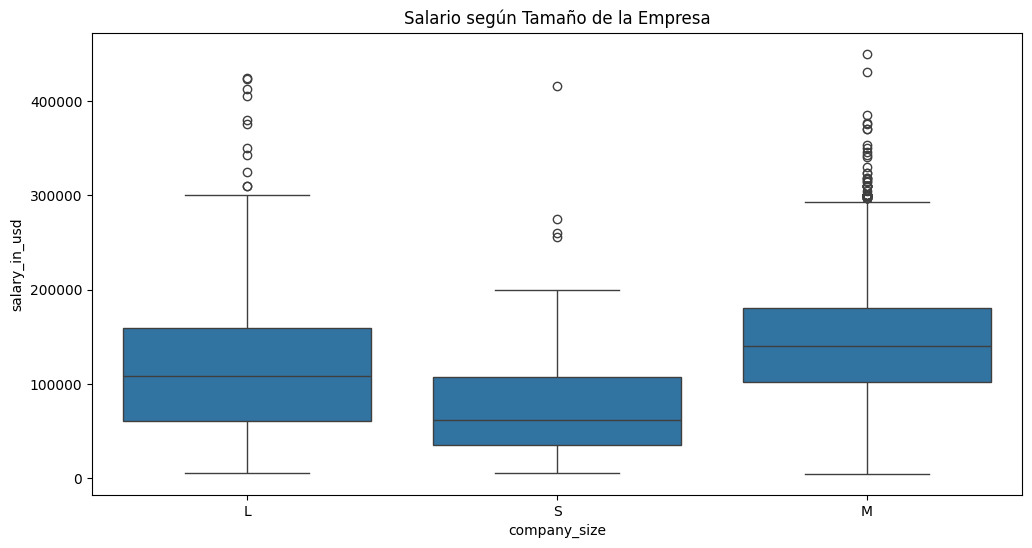

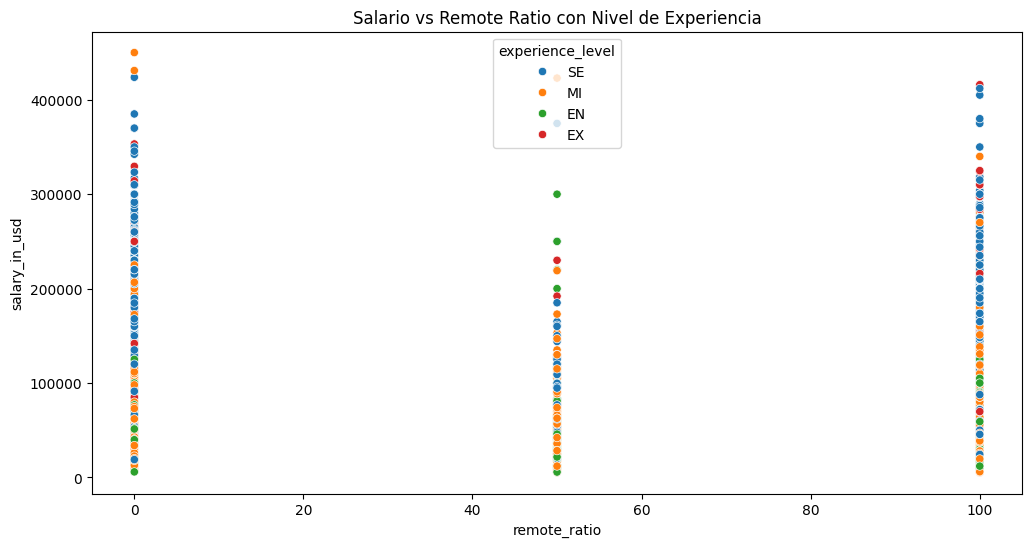

In [18]:
# Análisis Bivariante de la variable target con experience_level, ompany_size y remote_ratio
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['experience_level'], y=df['salary_in_usd'])
plt.title('Salario según Nivel de Experiencia')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['company_size'], y=df['salary_in_usd'])
plt.title('Salario según Tamaño de la Empresa')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['remote_ratio'], y=df['salary_in_usd'], hue=df['experience_level'])
plt.title('Salario vs Remote Ratio con Nivel de Experiencia')
plt.show()

##### Realizamos este análisis para ncontrar patrones que podrían ser útiles para el modelo.

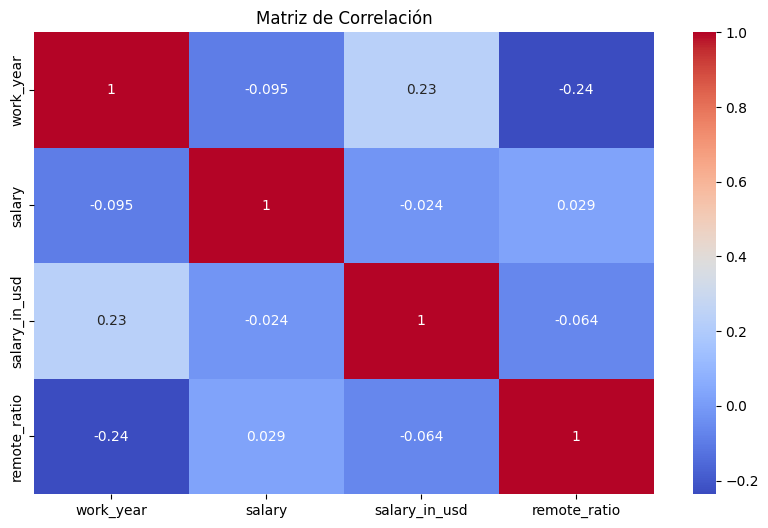

In [7]:
# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


##### Realizamos la matriz de correlación para ver si algunas variables están altamente correlacionadas, lo que podría afectar la multicolinealidad en el modelo.

In [19]:
# División en Train y Test 80% para train y 20% para test
X = df[num_features + cat_features]
y = df['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Preprocesamiento con Pipelines
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

##### Utilizamos StandardScaler() para normalizar las variables numéricas y OneHotEncoder(handle_unknown='ignore') evita errores si aparecen categorías nuevas en los datos de prueba.

##### Se crea un ColumnTransformer para aplicar ambas transformaciones en una sola operación.

##### Todo esto para automatizar la transformación de datos y evitar fugas de información en la validación cruzada.



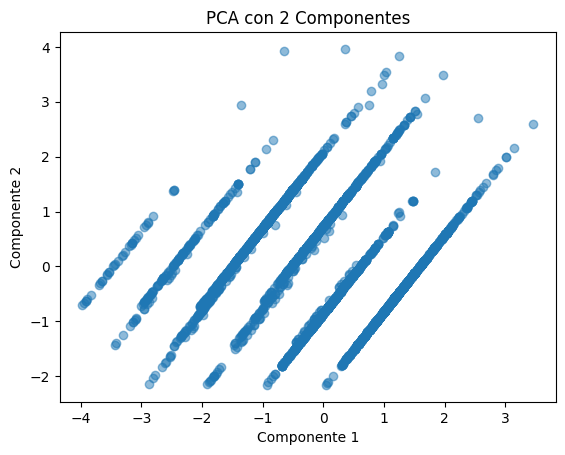

In [15]:
# Aplicación de PCA para análisis exploratorio
pca = PCA(n_components=2)
X_pca = pca.fit_transform(StandardScaler().fit_transform(df[num_features]))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA con 2 Componentes')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

##### Se aplica PCA (Análisis de Componentes Principales) a las variables numéricas.
##### Se escalan los datos antes de PCA para evitar que variables con grandes valores numéricos dominen la variabilidad.
##### Todo esto para explorar la estructura de los datos y ver si hay agrupaciones o patrones ocultos.